In [1]:
import os

import pandas as pd
import seaborn as sns

In [2]:
df_results = pd.DataFrame()
for f in [f for f in os.listdir('../results/') if 'resnet' in f]:
    df_results = pd.concat((df_results,pd.read_csv(f'../results/{f}')))

df_results.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df_results

,epoch,test_losses,train_losses,test_accuracies,train_accuracies,train_percentage,synth_percentage,transform,sim_num,category
0,0,0.938888,1.042303,0.542188,0.511393,0.6,0.0,minimal,0,minimal_0.6_0.0
1,1,0.914413,0.973463,0.561719,0.537435,0.6,0.0,minimal,0,minimal_0.6_0.0
2,2,0.915984,0.955719,0.561719,0.540039,0.6,0.0,minimal,0,minimal_0.6_0.0
3,3,0.929656,0.938872,0.557813,0.547526,0.6,0.0,minimal,0,minimal_0.6_0.0
4,4,0.960703,0.949610,0.557031,0.544271,0.6,0.0,minimal,0,minimal_0.6_0.0
...,...,...,...,...,...,...,...,...,...,...
95,5,0.982752,0.926800,0.533594,0.560059,0.8,0.0,basic,9,basic_0.8_0.0
96,6,0.866575,0.910035,0.577344,0.559814,0.8,0.0,basic,9,basic_0.8_0.0
97,7,0.840400,0.873396,0.584375,0.581299,0.8,0.0,basic,9,basic_0.8_0.0
98,8,0.837281,0.852741,0.593750,0.594971,0.8,0.0,basic,9,basic_0.8_0.0


<Axes: xlabel='epoch', ylabel='test_losses'>

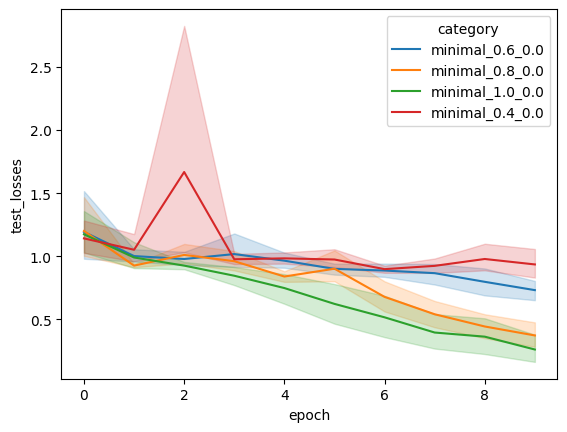

In [16]:
sns.lineplot(
    data=df_results[df_results['category'].isin(
        [
            'minimal_1.0_0.0',
            'minimal_0.8_0.0',
            'minimal_0.6_0.0',
            'minimal_0.4_0.0',
        ])],
    x='epoch',
    y='test_losses',
    hue='category'
)
